In [1]:

import pandas as pd
import numpy as np
import statsmodels.api as sm
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [1]:
!export PATH=/Library/TeX/texbin:$PATH

In [2]:
df=pd.read_csv('anime.csv')

In [3]:
print("\ndf shape: \n{}".format(df.shape),"\n\n")
df.info()


df shape: 
(1000, 15) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1000 non-null   int64  
 1   title        1000 non-null   object 
 2   type         1000 non-null   object 
 3   episodes     1000 non-null   object 
 4   score        1000 non-null   float64
 5   members      1000 non-null   object 
 6   favorites    1000 non-null   object 
 7   genre        1000 non-null   object 
 8   studio       1000 non-null   object 
 9   rating       1000 non-null   object 
 10  demographic  458 non-null    object 
 11  theme        637 non-null    object 
 12  popularity   1000 non-null   object 
 13  source       1000 non-null   object 
 14  rank         1000 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 117.3+ KB


In [4]:
def preprocess(df):
    
    df.drop('Unnamed: 0',axis=1,inplace=True)
    df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')
    df['members']=df['members'].str.replace(',','').astype(int)
    df['popularity']=df['popularity'].str.replace('#','').astype(int)
    df['favorites']=df['favorites'].str.replace(',','').astype(int)
    df['rank']=df['rank'].str.replace('#','').astype(int)
    
    
    
    return df
df=preprocess(df)
df

,title,type,episodes,score,members,favorites,genre,studio,rating,demographic,theme,popularity,source,rank
0,Fullmetal Alchemist: Brotherhood,TV,64.0,9.16,2633937,186616,Action,Bones,R - 17+ (violence & profanity),Shounen,Military,3,Manga,1
1,Shingeki no Kyojin Season 3 Part 2,TV,10.0,9.10,1549705,44111,Action,Wit Studio,R - 17+ (violence & profanity),Shounen,Military,34,Manga,2
2,Steins;Gate,TV,24.0,9.10,2059997,158181,Drama,White Fox,PG-13 - Teens 13 or older,NaN,Psychological,11,Visual novel,3
3,Gintama°,TV,51.0,9.09,473517,12371,Action,Bandai Namco Pictures,PG-13 - Teens 13 or older,Shounen,Historical,338,Manga,4
4,Fruits Basket: The Final,TV,13.0,9.08,260523,11907,Comedy,TMS Entertainment,PG-13 - Teens 13 or older,Shoujo,NaN,666,Manga,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Uchuu no Kishi Tekkaman Blade OVA: Twin Blood,OVA,1.0,6.98,3588,6,Action,add some,R - 17+ (violence & profanity),Shounen,Mecha,7863,Unknown,3846
996,Urayasu Tekkin Kazoku,TV,33.0,6.98,1753,9,Comedy,Studio Deen,R - 17+ (violence & profanity),Shounen,NaN,9713,Manga,3847
997,Xi You Ji,TV,52.0,6.98,665,6,Adventure,add some,PG - Children,NaN,NaN,12133,Novel,3848
998,Xing Wushen Jue,ONA,40.0,6.98,961,8,Action,Ruo Hong Culture,PG-13 - Teens 13 or older,NaN,Historical,11155,Novel,3849


In [73]:
df.corr()

,episodes,score,members,favorites,popularity,rank
episodes,1.000000,0.059281,0.084521,0.107027,-0.018271,-0.057601
score,0.059281,1.000000,0.515809,0.459929,-0.435406,-0.923625
members,0.084521,0.515809,1.000000,0.816309,-0.499910,-0.393292
favorites,0.107027,0.459929,0.816309,1.000000,-0.252390,-0.297972
popularity,-0.018271,-0.435406,-0.499910,-0.252390,1.000000,0.439599
rank,-0.057601,-0.923625,-0.393292,-0.297972,0.439599,1.000000


In [74]:
print("\ndf shape: \n{}".format(df.shape),"\n\n")
df.info();


df shape: 
(1000, 14) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        1000 non-null   object 
 1   type         1000 non-null   object 
 2   episodes     996 non-null    float64
 3   score        1000 non-null   float64
 4   members      1000 non-null   int64  
 5   favorites    1000 non-null   int64  
 6   genre        1000 non-null   object 
 7   studio       1000 non-null   object 
 8   rating       1000 non-null   object 
 9   demographic  458 non-null    object 
 10  theme        637 non-null    object 
 11  popularity   1000 non-null   int64  
 12  source       1000 non-null   object 
 13  rank         1000 non-null   int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 109.5+ KB


In [75]:
df.corr()

,episodes,score,members,favorites,popularity,rank
episodes,1.000000,0.059281,0.084521,0.107027,-0.018271,-0.057601
score,0.059281,1.000000,0.515809,0.459929,-0.435406,-0.923625
members,0.084521,0.515809,1.000000,0.816309,-0.499910,-0.393292
favorites,0.107027,0.459929,0.816309,1.000000,-0.252390,-0.297972
popularity,-0.018271,-0.435406,-0.499910,-0.252390,1.000000,0.439599
rank,-0.057601,-0.923625,-0.393292,-0.297972,0.439599,1.000000


In [76]:
df=df.drop(['score','title'],axis=1)
df

,type,episodes,members,favorites,genre,studio,rating,demographic,theme,popularity,source,rank
0,TV,64.0,2633937,186616,Action,Bones,R - 17+ (violence & profanity),Shounen,Military,3,Manga,1
1,TV,10.0,1549705,44111,Action,Wit Studio,R - 17+ (violence & profanity),Shounen,Military,34,Manga,2
2,TV,24.0,2059997,158181,Drama,White Fox,PG-13 - Teens 13 or older,NaN,Psychological,11,Visual novel,3
3,TV,51.0,473517,12371,Action,Bandai Namco Pictures,PG-13 - Teens 13 or older,Shounen,Historical,338,Manga,4
4,TV,13.0,260523,11907,Comedy,TMS Entertainment,PG-13 - Teens 13 or older,Shoujo,NaN,666,Manga,5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,OVA,1.0,3588,6,Action,add some,R - 17+ (violence & profanity),Shounen,Mecha,7863,Unknown,3846
996,TV,33.0,1753,9,Comedy,Studio Deen,R - 17+ (violence & profanity),Shounen,NaN,9713,Manga,3847
997,TV,52.0,665,6,Adventure,add some,PG - Children,NaN,NaN,12133,Novel,3848
998,ONA,40.0,961,8,Action,Ruo Hong Culture,PG-13 - Teens 13 or older,NaN,Historical,11155,Novel,3849


Frequency before: 

 Action           403
Comedy           269
Adventure        113
Drama             87
Slice of Life     16
Mystery           15
Music             14
Sports            12
Horror            11
Sci-Fi            11
Fantasy           11
Boys Love         10
Romance            9
Avant Garde        6
Gourmet            2
Military           2
Shoujo             2
Historical         2
Suspense           2
Harem              1
Supernatural       1
Girls Love         1
Name: genre, dtype: int64 



Frequency less than 50: 

Index(['Slice of Life', 'Mystery', 'Music', 'Sports', 'Horror', 'Sci-Fi',
       'Fantasy', 'Boys Love', 'Romance', 'Avant Garde', 'Gourmet', 'Military',
       'Shoujo', 'Historical', 'Suspense', 'Harem', 'Supernatural',
       'Girls Love'],
      dtype='object') 



The new frequency count after changing Smaller values to other:

 Action       403
Comedy       269
Others       128
Adventure    113
Drama         87
Name: genre, dtype: int64


<AxesSubplot:ylabel='genre'>

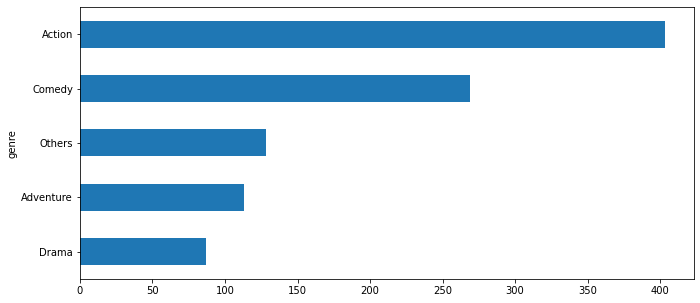

In [77]:
'''Lets explore genre value frequency and change values of any count
less than 8'''


counts=df.genre.value_counts()
print("Frequency before: \n\n {}".format(counts),"\n\n\n")

idx = counts[counts.lt(50)].index
print("Frequency less than 50: \n\n{}".format(idx),"\n\n\n")

df.loc[df['genre'].isin(idx), 'genre'] = 'Others'
l=df.genre.value_counts()
print("The new frequency count after changing Smaller values to other:\n\n {}".format(l))

l.sort_values().plot(kind='barh',figsize=(11,5),ylabel="Count",xlabel="genre")

Frequency before: 

 Sunrise                60
Toei Animation         47
J.C.Staff              42
add some               40
Madhouse               39
                       ..
Studio Rikka            1
Nice Boat Animation     1
Bee Train               1
Square Enix             1
TNK                     1
Name: studio, Length: 152, dtype: int64 



Frequency less than 30: 

Index(['Bones', 'Shaft', 'Shin-Ei Animation', 'Nippon Animation',
       'Kyoto Animation', 'OLM', 'Brain's Base', 'Gonzo', 'Wit Studio',
       'Satelight',
       ...
       'Telescreen', 'Chaos Project', 'Enishiya', 'ILCA', 'Revoroot',
       'Studio Rikka', 'Nice Boat Animation', 'Bee Train', 'Square Enix',
       'TNK'],
      dtype='object', length=142) 



The new frequency count after changing Smaller values to other:

 Others               602
Sunrise               60
Toei Animation        47
J.C.Staff             42
add some              40
Madhouse              39
TMS Entertainment     37
Production I.G  

<AxesSubplot:ylabel='studio'>

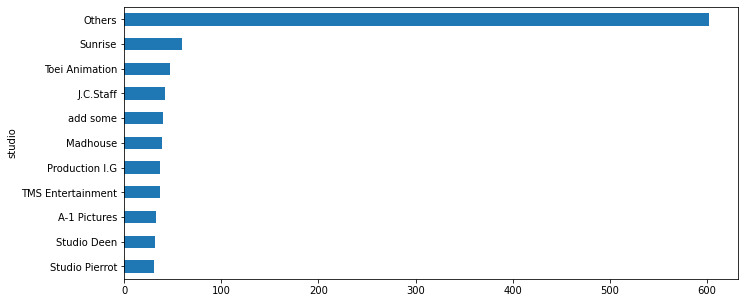

In [78]:
'''Lets explore genre value frequency and change values of any count
less than 8'''


counts=df.studio.value_counts()
print("Frequency before: \n\n {}".format(counts),"\n\n\n")

idx = counts[counts.lt(30)].index
print("Frequency less than 30: \n\n{}".format(idx),"\n\n\n")

df.loc[df['studio'].isin(idx), 'studio'] = 'Others'
l=df.studio.value_counts()
print("The new frequency count after changing Smaller values to other:\n\n {}".format(l))

l.sort_values().plot(kind='barh',figsize=(11,5),ylabel="Count",xlabel="studio")

#  Observe Missing values 

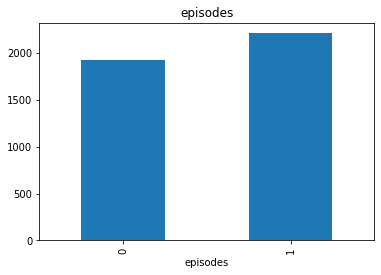

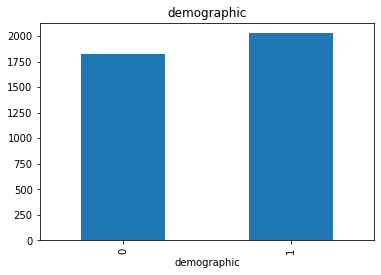

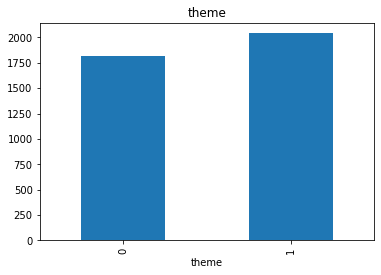

In [79]:
features_with_na = [i for i in df.columns if df[i].isnull().sum()>1]
for i in features_with_na:
    data=df.copy()
    data[i]=np.where(data[i].isnull(),1,0) # 1 is for when the value is missing
    data.groupby(i)['rank'].median().plot.bar()
    plt.title(i)
    plt.show()

In [80]:
df['episodes']=df['episodes'].fillna(1.0)

In [81]:
print('N/A Count Before:\n\n{}\n\n'.format(df.isna().sum()))
values = { "demographic": 'other', "theme": 'other'}
df=df.fillna(value=values)
print('N/A Count after Fillna:\n\n{}'.format(df.isna().sum()))

N/A Count Before:

type             0
episodes         0
members          0
favorites        0
genre            0
studio           0
rating           0
demographic    542
theme          363
popularity       0
source           0
rank             0
dtype: int64


N/A Count after Fillna:

type           0
episodes       0
members        0
favorites      0
genre          0
studio         0
rating         0
demographic    0
theme          0
popularity     0
source         0
rank           0
dtype: int64


## Observing Numerical features

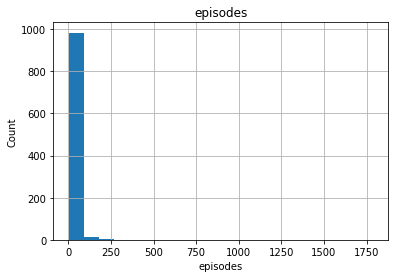

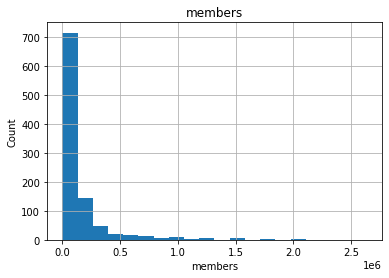

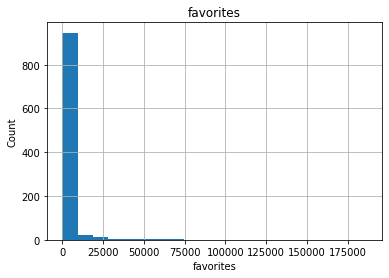

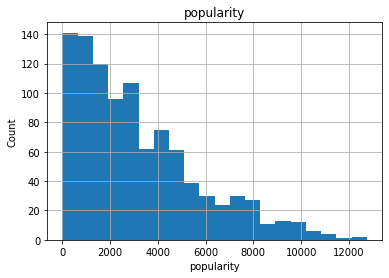

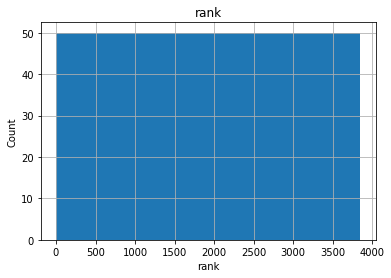

In [82]:
numerical_features = [i for i in df.columns if df[i].dtypes != 'O']
#numerical features can be discrete and continuous but we dont have any discrete features so remains continuous
for i in numerical_features:
    data=df.copy()
    data[i].hist(bins=20)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i)
    plt.show()


## Observing categorical fatures

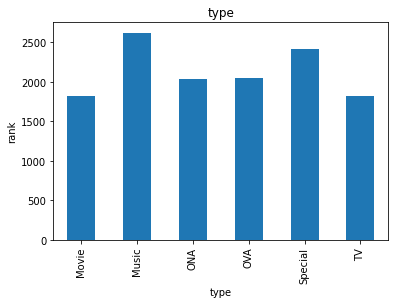

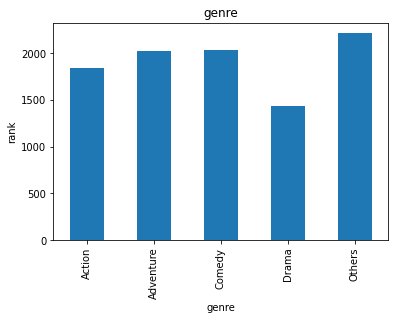

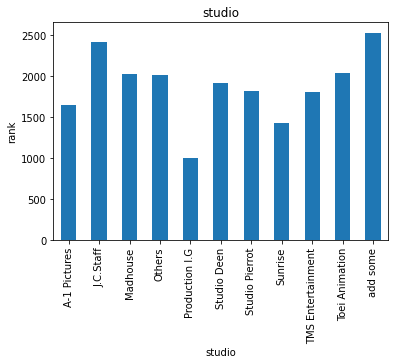

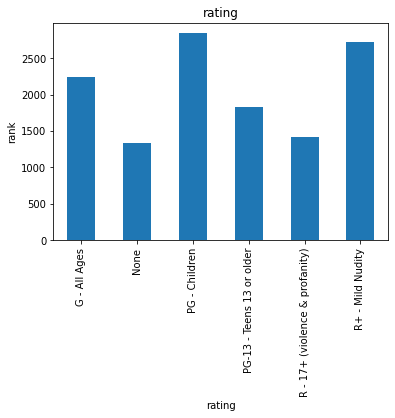

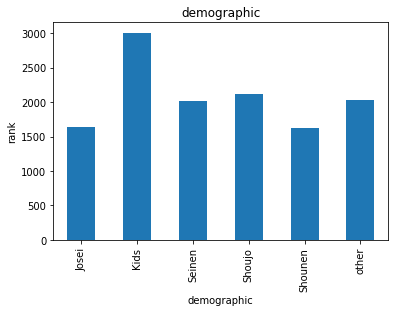

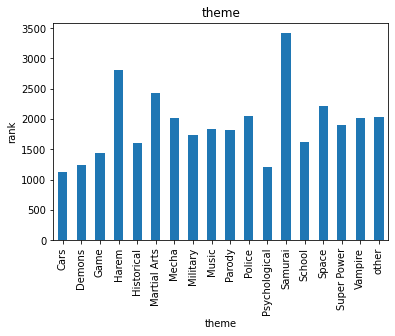

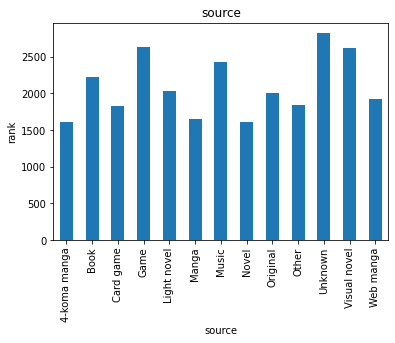

In [83]:
categorical_features=[i for i in df.columns if df[i].dtypes == 'O']
for i in categorical_features:
    data=df.copy()
    data.groupby(i)['rank'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('rank')
    plt.title(i)
    plt.show()

In [84]:
df.genre.value_counts()

Action       403
Comedy       269
Others       128
Adventure    113
Drama         87
Name: genre, dtype: int64

observing the bars ahead, it was expected that title would not have nay impact on rank, but also studio seems to be the same , therefore I will be dropping the two columns.

In [85]:

df=shuffle(df)
#shuffle the df because it is mainly ordered by the rank  which is our target
df

,type,episodes,members,favorites,genre,studio,rating,demographic,theme,popularity,source,rank
967,TV,12.0,2137,1,Comedy,Studio Deen,PG-13 - Teens 13 or older,other,other,9176,Manga,3818
872,ONA,1.0,782,7,Comedy,Others,G - All Ages,other,other,11677,Game,3423
191,Movie,1.0,112846,1104,Others,Sunrise,PG-13 - Teens 13 or older,other,Music,1436,Original,642
337,OVA,4.0,68477,434,Others,Studio Deen,PG-13 - Teens 13 or older,other,Historical,2056,Manga,1238
410,Special,1.0,190139,151,Comedy,Others,PG-13 - Teens 13 or older,other,School,927,Light novel,1611
...,...,...,...,...,...,...,...,...,...,...,...,...
7,OVA,110.0,259639,13591,Drama,Others,R - 17+ (violence & profanity),other,Military,671,Novel,8
103,TV,21.0,168157,1649,Comedy,Others,PG-13 - Teens 13 or older,Shounen,Demons,1017,Manga,404
77,ONA,13.0,3566,23,Action,Others,PG-13 - Teens 13 or older,other,Historical,7910,Novel,228
994,TV,25.0,68283,252,Comedy,Others,PG-13 - Teens 13 or older,Seinen,Vampire,2062,Manga,3845


### From the features that are categorical variables , I will leave out the title and studio  from the encoding process since they are relatively less limportant than the features like genre,theme etc

In [86]:
print("\nOriginal features: \n\n ",list(df.columns),"\n\n")

df_dummies=pd.get_dummies(df)

print("\nFeatures after encoding:\n\n",list(df_dummies.columns))
#df_dummies.drop(['demographic_other', 'theme_other','genre_Others','type_Music','rating_None','source_Other'], axis=1,inplace=True)


Original features: 

  ['type', 'episodes', 'members', 'favorites', 'genre', 'studio', 'rating', 'demographic', 'theme', 'popularity', 'source', 'rank'] 



Features after encoding:

 ['episodes', 'members', 'favorites', 'popularity', 'rank', 'type_Movie', 'type_Music', 'type_ONA', 'type_OVA', 'type_Special', 'type_TV', 'genre_Action', 'genre_Adventure', 'genre_Comedy', 'genre_Drama', 'genre_Others', 'studio_A-1 Pictures', 'studio_J.C.Staff', 'studio_Madhouse', 'studio_Others', 'studio_Production I.G', 'studio_Studio Deen', 'studio_Studio Pierrot', 'studio_Sunrise', 'studio_TMS Entertainment', 'studio_Toei Animation', 'studio_add some', 'rating_G - All Ages', 'rating_None', 'rating_PG - Children', 'rating_PG-13 - Teens 13 or older', 'rating_R - 17+ (violence & profanity)', 'rating_R+ - Mild Nudity', 'demographic_Josei', 'demographic_Kids', 'demographic_Seinen', 'demographic_Shoujo', 'demographic_Shounen', 'demographic_other', 'theme_Cars', 'theme_Demons', 'theme_Game', 'theme_Harem', 

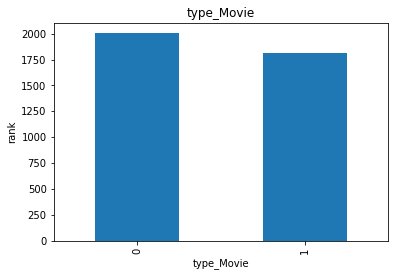

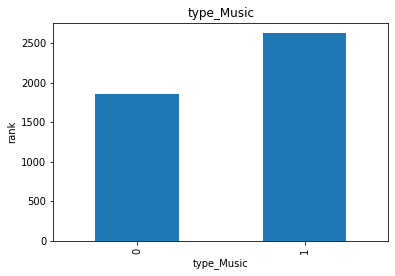

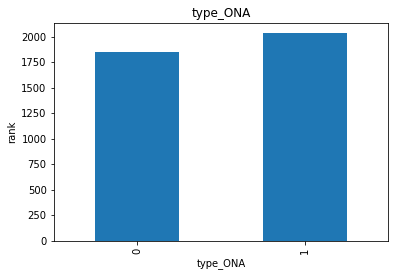

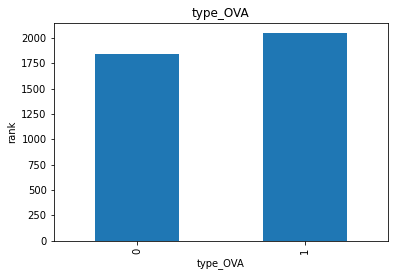

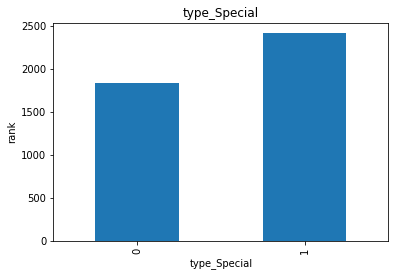

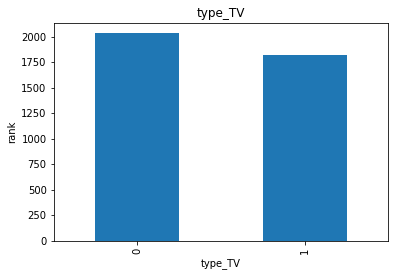

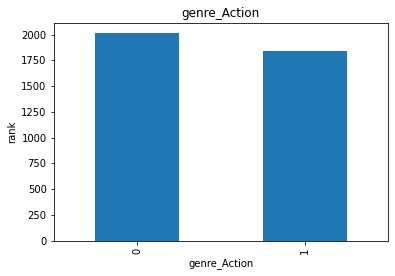

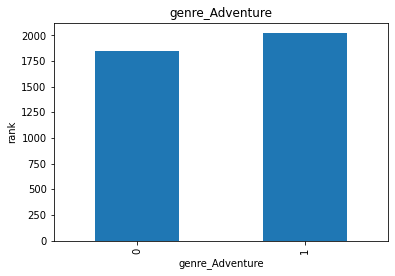

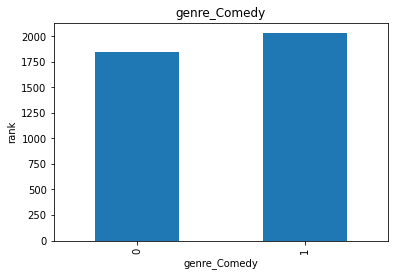

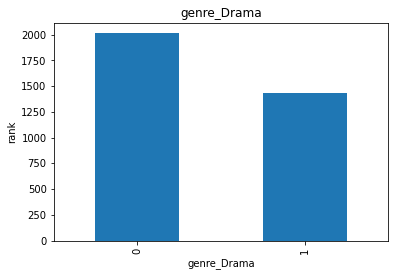

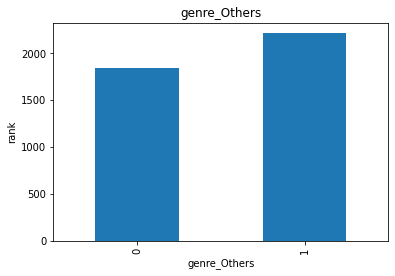

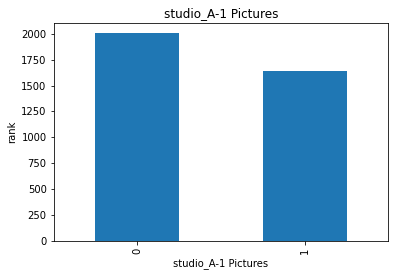

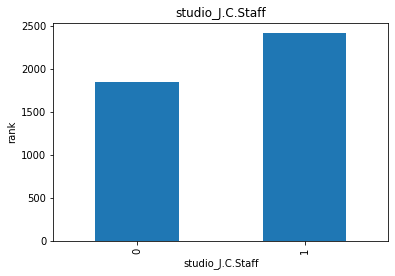

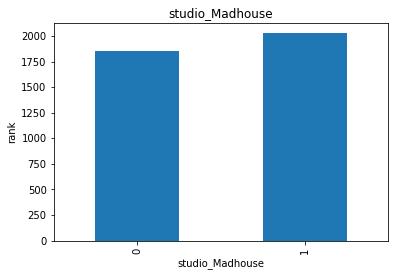

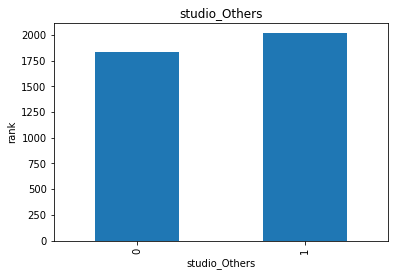

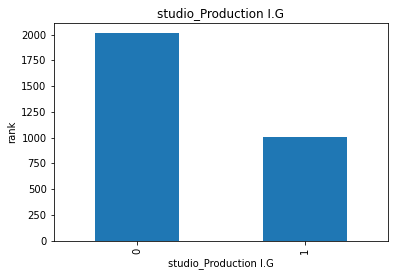

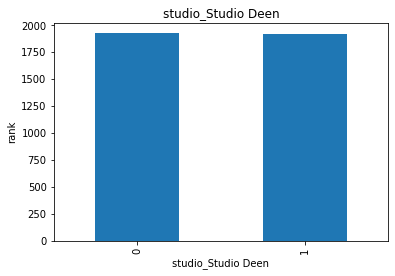

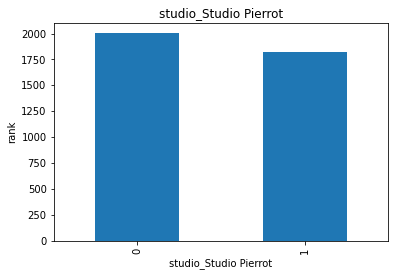

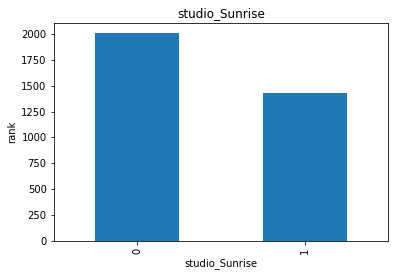

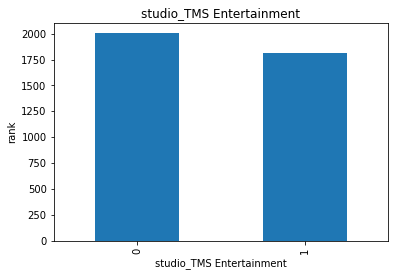

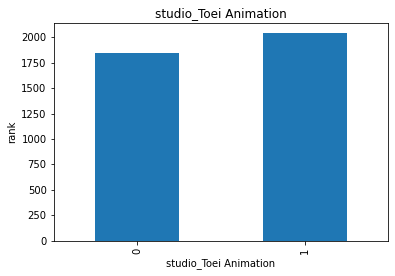

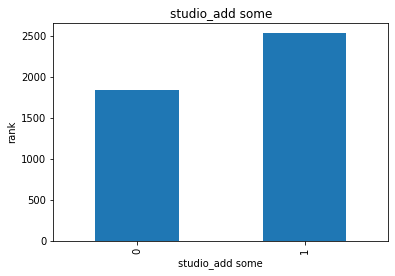

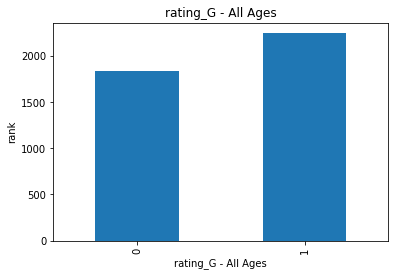

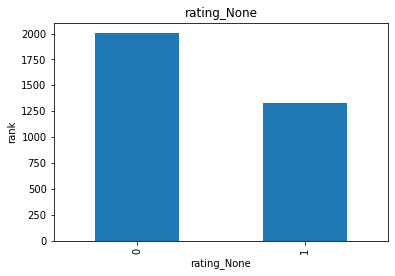

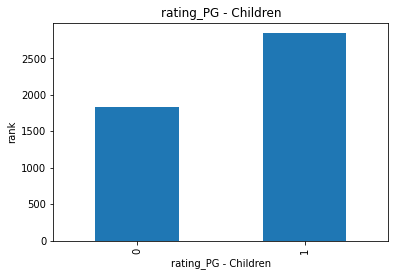

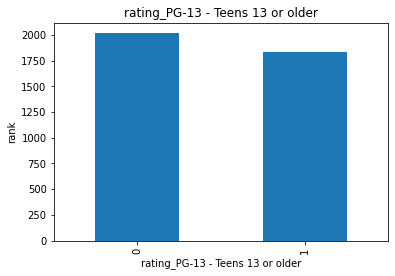

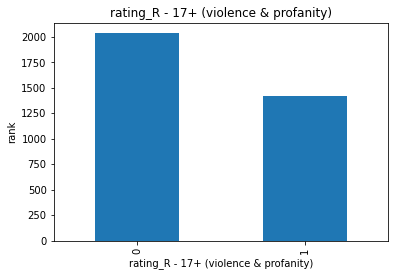

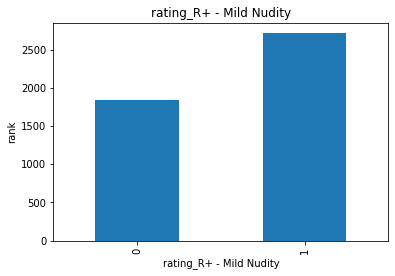

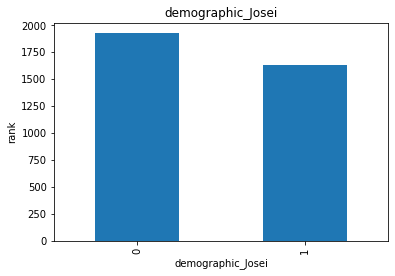

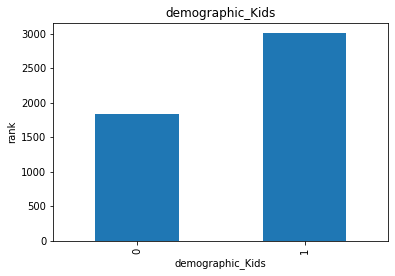

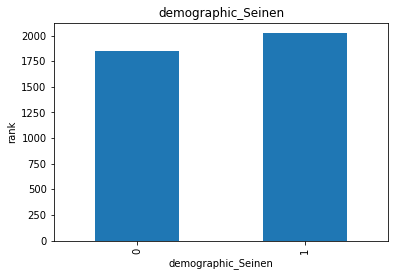

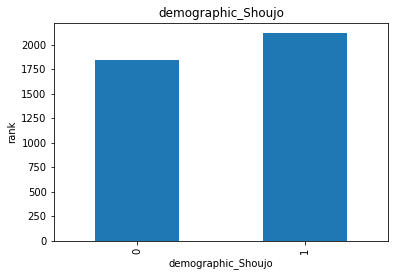

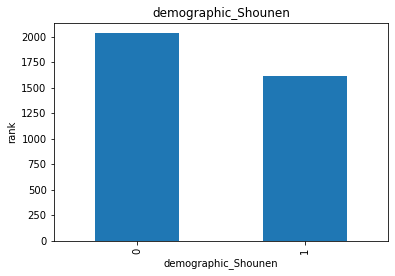

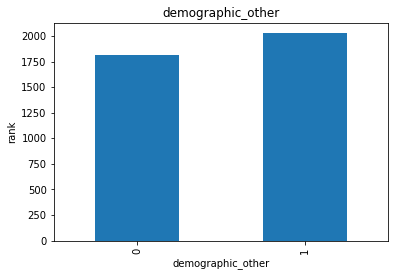

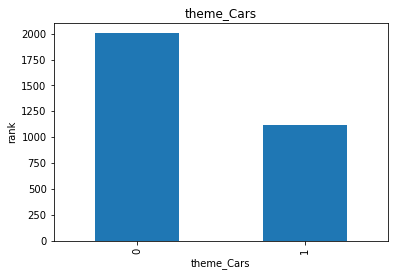

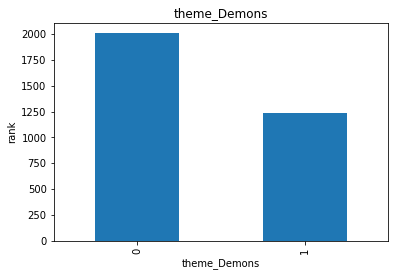

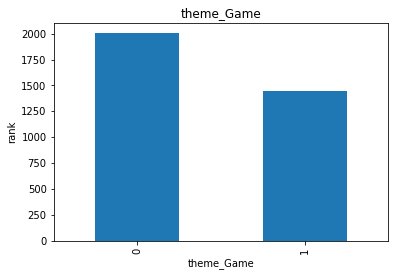

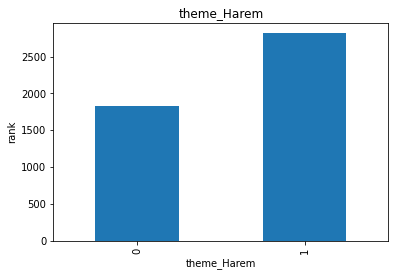

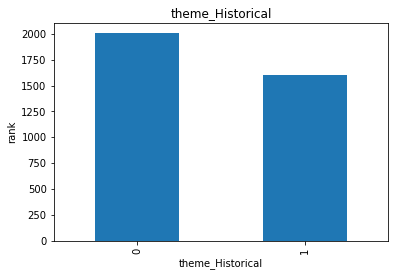

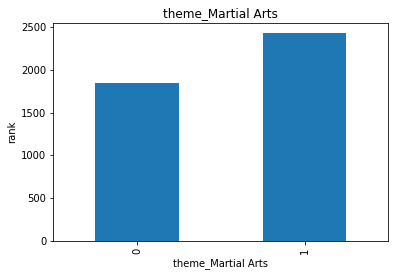

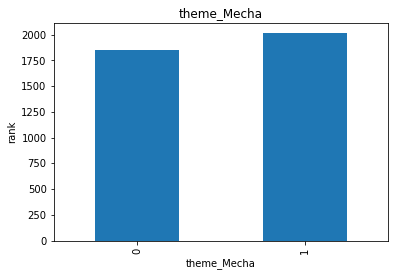

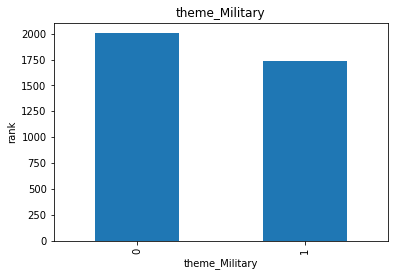

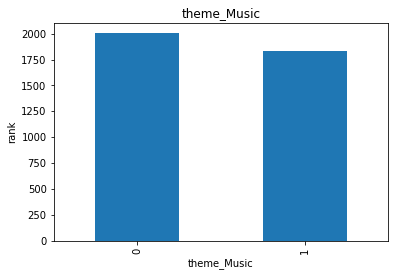

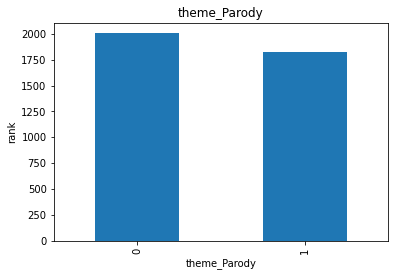

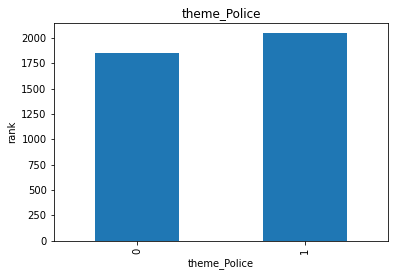

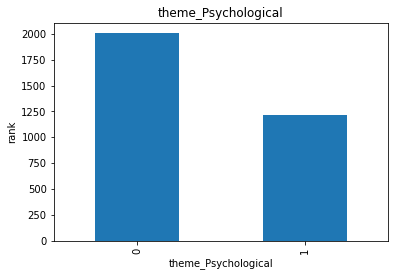

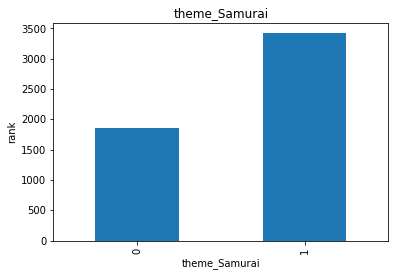

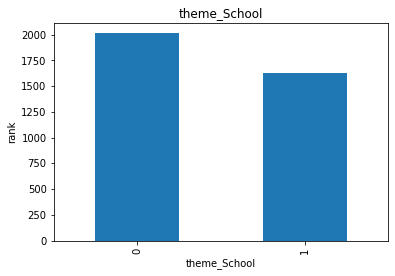

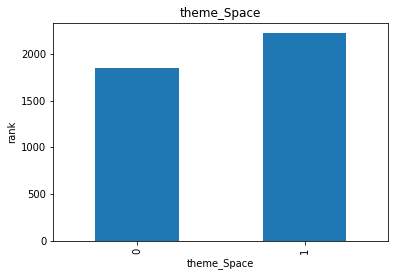

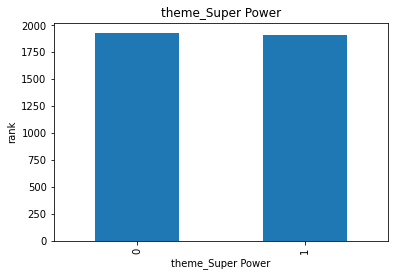

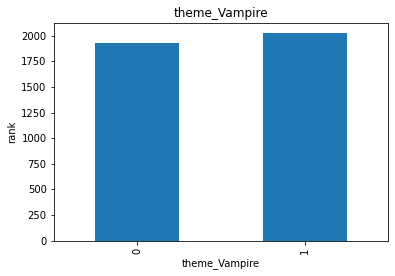

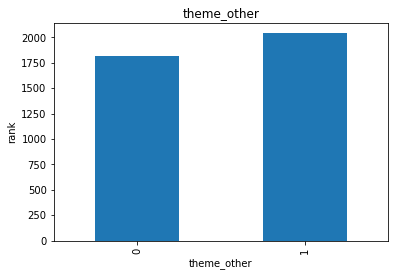

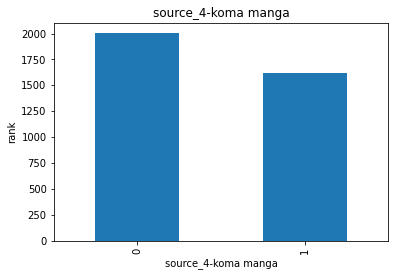

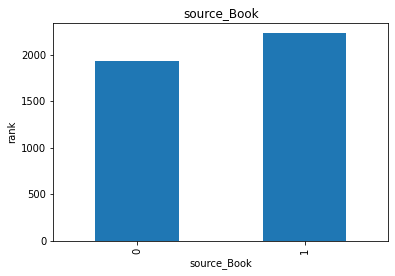

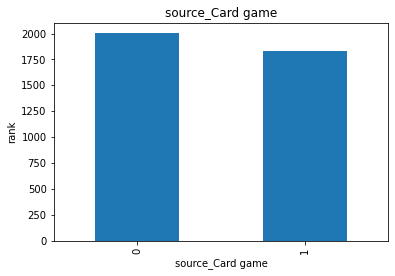

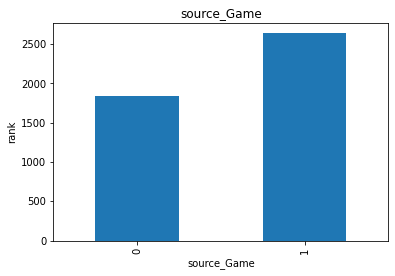

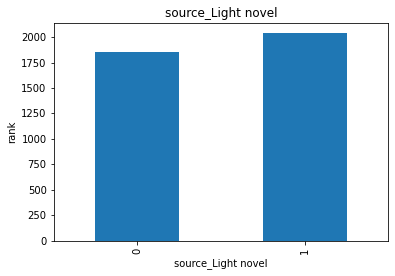

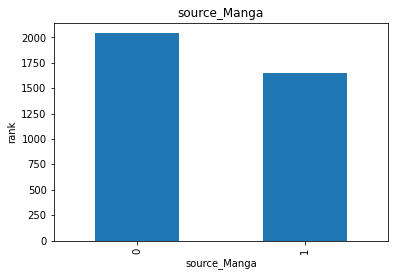

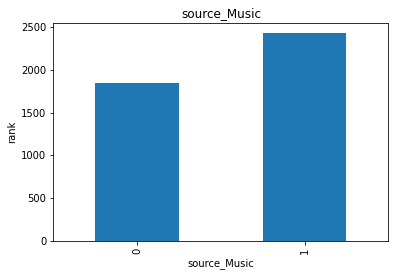

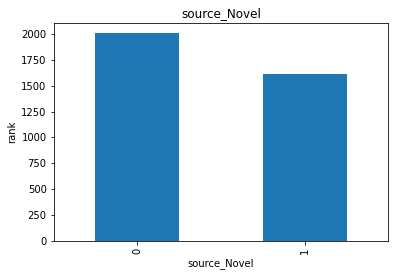

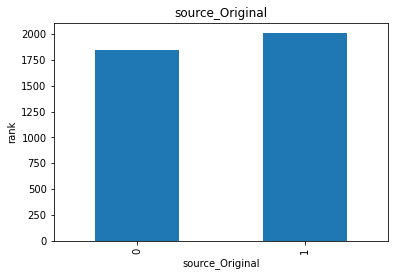

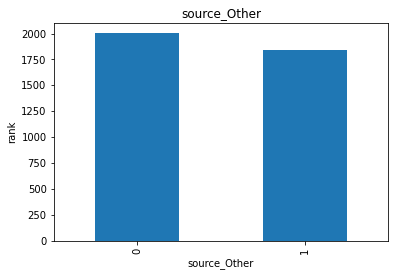

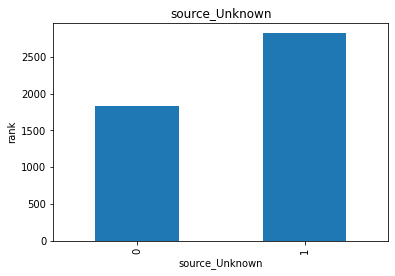

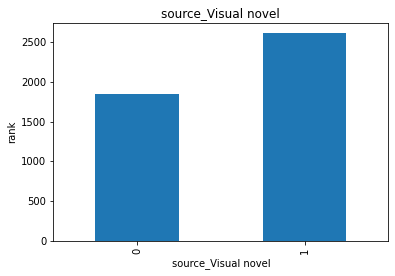

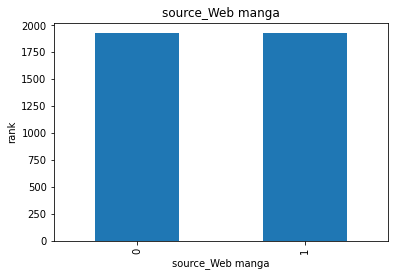

In [25]:
dummy_features=[i for i in df_dummies.columns if df_dummies[i].dtypes == "uint8"]
for i in dummy_features:
    data=df_dummies.copy()
    data.groupby(i)['rank'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('rank')
    plt.title(i)
    plt.show()

## Selecting features manually based on chart above and its relation to the target

In [38]:
manually_selected=['episodes', 'members', 'favorites', 'popularity', 'rank','type_Music','type_Special','genre_Drama',
                  'studio_A-1 Pictures','studio_J.C.Staff','studio_Production I.G','studio_Sunrise','rating_PG - Children',
                  'rating_R - 17+ (violence & profanity)', 'rating_R+ - Mild Nudity','demographic_Kids','demographic_Shounen',
                  'theme_Cars', 'theme_Demons', 'theme_Game','theme_Harem','theme_Psychological','theme_Samurai','source_Visual novel',
                  ]

In [87]:
df_dummies.shape

(1000, 70)

## Trying Kbest to selects features

In [63]:
data=df_dummies.copy()
X=data[data.columns.difference(['rank'],sort = False)]
y=data['rank']

In [64]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, SelectKBest

# Feature selection using SelectKBest
# Fit a model using F-value(f_regression) method 
skb = SelectKBest(f_regression).fit(X, y)
score=[]
val=[]
for skb, var in sorted(zip(map(abs,skb.scores_),X.columns[:-1]), reverse=True):
    score.append(skb)
    val.append(var)

skb_df = pd.DataFrame({"Feature": val,"Scores":score}) 

In [65]:
skb_df.head(50);

In [66]:
selected_col = val[0:50]
selected_col.append('rank')

In [67]:
main_df=df_dummies.loc[:, df_dummies.columns.isin(selected_col)]

In [35]:
main_df.shape,df_dummies.shape

((1000, 51), (1000, 70))

In [37]:
main_df;

## Trying Lasso to Feature select for next step modeling

In [69]:
data=df_dummies.copy()

X=data[data.columns.difference(['rank'],sort = False)]
y=data['rank']

In [70]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=.01)
lasso_model.fit(X, y)
labels=[]
for label, value in zip(X.columns, lasso_model.coef_):
    if value > 0.01:
        print(label, ":", value)
        labels.append(label)

print(lasso_model.score(X, y))

popularity : 0.21777608909746557
type_Special : 37.28930287442886
type_TV : 147.3749829912477
genre_Action : 109.4638154462627
genre_Others : 245.38107255205907
studio_A-1 Pictures : 161.41656325929063
studio_J.C.Staff : 504.9321630118398
studio_Madhouse : 97.26361019381577
studio_Others : 55.115408484327055
studio_Studio Pierrot : 453.2749293361766
studio_Toei Animation : 53.31717630065799
rating_PG - Children : 122.23453607518096
rating_PG-13 - Teens 13 or older : 1.9979916017941493
rating_R+ - Mild Nudity : 505.13279938574266
demographic_Kids : 441.94502505983263
demographic_Seinen : 193.82518027822087
demographic_Shoujo : 81.89505586700822
theme_Harem : 797.7522165572782
theme_Martial Arts : 395.7066339606132
theme_Mecha : 50.18009038259017
theme_Military : 136.03391648366738
theme_Psychological : 44.332440324580496
theme_Samurai : 1673.1581071295311
theme_Super Power : 213.6346242985862
theme_Vampire : 111.2089527202927
theme_other : 3.645721490710882
source_Card game : 456.885599

/Users/yonga/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.232e+07, tolerance: 1.330e+05
  model = cd_fast.enet_coordinate_descent(


In [71]:
labels.append('rank')


In [27]:
main_df=df_dummies.loc[:, df_dummies.columns.isin(manually_selected)]

In [28]:
main_df

,episodes,members,favorites,popularity,rank,type_Music,type_Special,genre_Drama,studio_A-1 Pictures,studio_J.C.Staff,...,rating_R+ - Mild Nudity,demographic_Kids,demographic_Shounen,theme_Cars,theme_Demons,theme_Game,theme_Harem,theme_Psychological,theme_Samurai,source_Visual novel
677,1.0,12386,53,4830,2628,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
913,1.0,6253,14,6360,3614,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
773,1.0,5503,4,6706,3024,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
483,22.0,129343,709,1310,1834,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
548,39.0,12808,68,4741,2049,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,25.0,28100,176,3366,2215,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
464,1.0,123910,331,1346,1815,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
193,34.0,95499,1040,1667,644,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
802,1.0,17130,13,4241,3203,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Try randome forrest for feature selection

In [88]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

In [89]:
data=df_dummies.copy()

X=data[data.columns.difference(['rank'],sort = False)]
y=data['rank']

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [94]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (800, 69)
X_train_l1.shape: (800, 35)


In [99]:
X_train_l1

array([[1.00000e+00, 1.99980e+04, 4.60000e+01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.60000e+01, 8.55900e+03, 2.20000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [2.40000e+01, 1.30028e+05, 4.08000e+02, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       ...,
       [4.30000e+01, 3.50800e+03, 1.30000e+01, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [1.20000e+01, 3.58081e+05, 1.54700e+03, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 2.82900e+03, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [97]:
from sklearn.linear_model import LinearRegression
X_test_l1 = select.transform(X_test)
score = LinearRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.317


# kbest had the best result for the intial model implementation

In [68]:
main_df.to_csv("EDA.csv",header=True, index=False)